# Neural networks
- Human Brain works with biological neurone. Abality of machine to reconize things like digit ,obj on it's own is known as neural network
- mUltiple neurone is combine to gorm a neurons network.

## Anatonamy of Neurone Network
- There is three layers
1. Input Layer   -->It takes pixels as input from image
2. Hidden layer  --> Doing computation and extracting the feature
3. Output layer   --> Provides prediction (i.e 0-9)


- Key concept
1. Weight: Learnable parameters controlling the input importance
2. Bias(b): Shift the activation function curve
3. Actiavtion function:Change to non-linearity(eg. ReLU, Sigmoid,tanh,etc.)
4. Loss Function: Measures how wrong out model is.
5. Optimizers:Adjust the weight to minimize loss(SGD,Adam,etc)



 -  Math behind Neural network:
    - x(i)-->Input
    - w(i) -->weight
    - b -->Bias
    - z --> Weighted sum
    - z = w1x1+w2x2+.............+wnxn+b


 - Actiavtion Function
    a=f(z)

    - if u used ReLu
     - f(z) = max(0,z)




# Classification of digits using Nm

# MNIST:- (Modifies National Institute of Standards Technology)
# This is Hellow World of computer Vision
- 70K image datas for handwritten digits (0-9)
- 28*28 size images (grayscale pixel)
- Train = 70k
- Test = 10k

# Preprocessing of MIST dataset
- Before feeding the neural network
- Flatten 28*28:784 input feature (for dense layer) or keep on 28*28 is we are using CNN(Convolutional neural neywork)
- Normalization : Divide  value by 255 to get in range [0,1]
- one-hot encoding : for eg [0 0 0 1 0 0 0 0 0 0]




# MiNIST  Dataset Training Testing and Evaluation
# Neural network architecture
- input:neurones
- Hidden layer: 128 neurone(ReLU)
- Outpur layer =10 neurones(0-9)

# For trainig 
1. Initialization Weightrandomly
2. Forward pass: Compute Prediction
3. Claculate loss:
        - summation(yicap)
4. Backpropagation KeyError
5. Update weight
6. Repeat it for many epochs until convergence



# challenges
1.Overfitting: mOdel memorizes training data but fails with new images data
  - Dropout , regularization
2.Underfitting: Model too simple (Less datasets)

3. Learning rate tuning: 
- too high = unstable 
- Too low = slow


In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.utils import to_categorical


2025-08-17 06:44:30.765278: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:31] Could not find cuda drivers on your machine, GPU will not be used.
2025-08-17 06:44:30.775906: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-08-17 06:44:31.111532: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F AVX512_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2025-08-17 06:44:33.333956: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To tur

(60000, 28, 28)


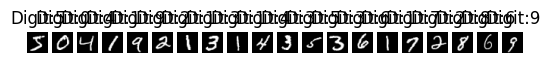

In [2]:
# lode datsset and lets visualize
(x_train,y_train),(x_test,y_test)=mnist.load_data()
print(x_train.shape)


# digit
# to display the multiple digit 
plt.Figure(figsize=(100,20))
for i in range(20):
    plt.subplot(1,20,i+1)
    plt.imshow(x_train[i],cmap='gray')
    plt.title(f"Digit:{y_train[i]}")
    plt.axis('off')
plt.show()
  
  





    

(60000, 28, 28)


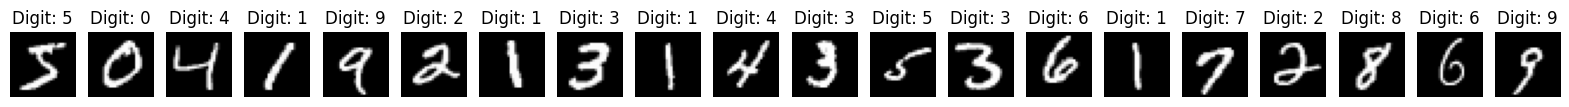

In [3]:


# Load dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()
print(x_train.shape)

# Display multiple digits
plt.figure(figsize=(20, 4))
for i in range(20):
    plt.subplot(1, 20, i + 1)
    plt.imshow(x_train[i], cmap='gray')
    plt.title(f"Digit: {y_train[i]}")
    plt.axis('off')

plt.show()


In [4]:

model = Sequential([
    # Flatten Layer
    Flatten(input_shape=(28, 28)),

    # First Hidden layer
    Dense(128, activation='relu'),

    # Second Hidden layer
    Dense(64, activation='relu'),

    # Output layer
    Dense(10, activation='softmax')
])


/home/manjil/miniconda3/envs/myenv/lib/python3.13/site-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)
2025-08-17 06:44:36.122552: E external/local_xla/xla/stream_executor/cuda/cuda_platform.cc:51] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: UNKNOWN ERROR (303)


In [5]:
# compile the  model 
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])
model.summary()


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten (Flatten)               │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       100,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 109,386 (427.29 KB)

 Trainable params: 109,386 (427.29 KB)

 Non-trainable params: 0 (0.00 B)

In [6]:
# train the model 
history=model.fit(
    x_train,
    y_train_cat,
    epochs=10,       # no of passes entire training datas
    batch_size=128,
    validation_split=0.1 # 10% of data remains for vqlidation
)

NameError: name 'y_train_cat' is not defined

In [ ]:
# model evaluation
loss,accuracy= model.evaluate(x_test,y_test_cat)
print(f"Test accuracy { accuracy} and loss value {loss}")

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9598 - loss: 0.1865
Test accuracy 0.9598000049591064 and loss value 0.18652597069740295


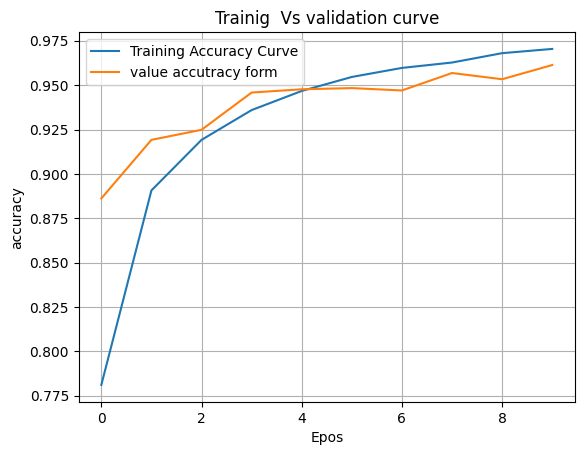

In [ ]:
# plotting the model 
plt.plot(history.history['accuracy'], label="Training Accuracy Curve")
plt.plot(history.history['val_accuracy'],label="value accutracy form")
plt.xlabel("Epos")
plt.ylabel("accuracy")
plt.title("Trainig  Vs validation curve")
plt.legend()
plt.grid(True)
plt.show()


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


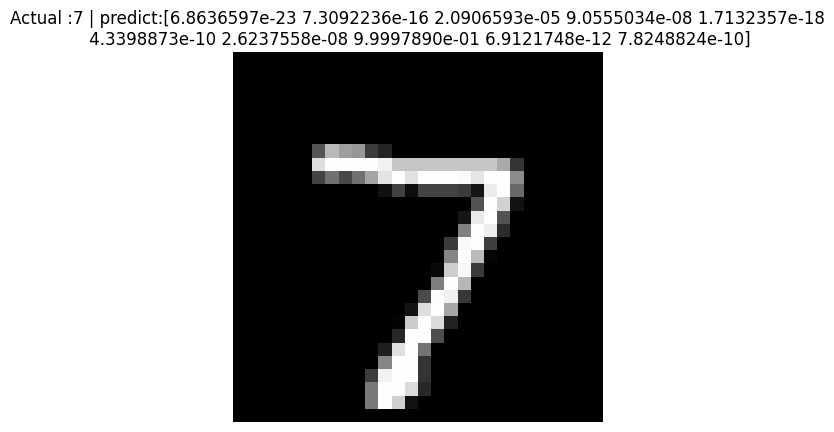

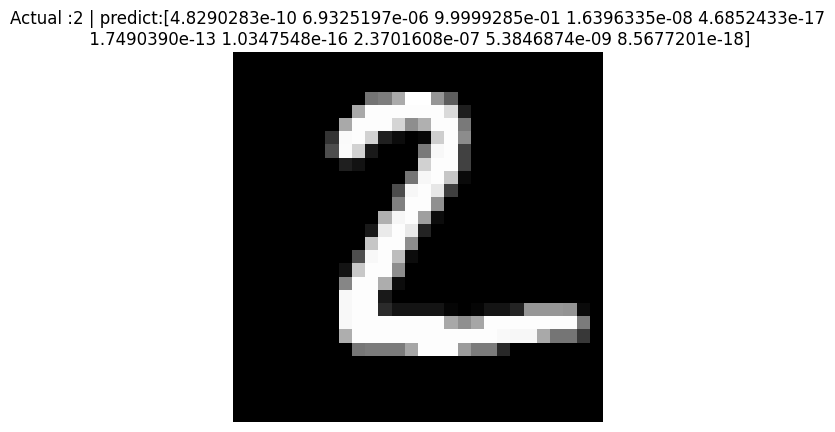

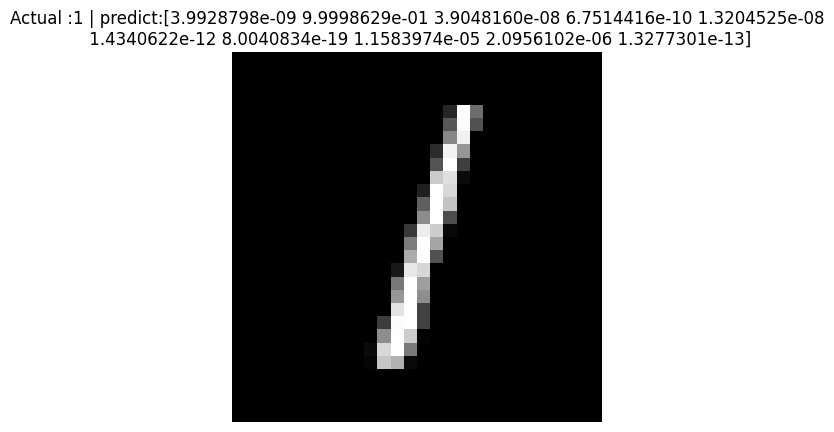

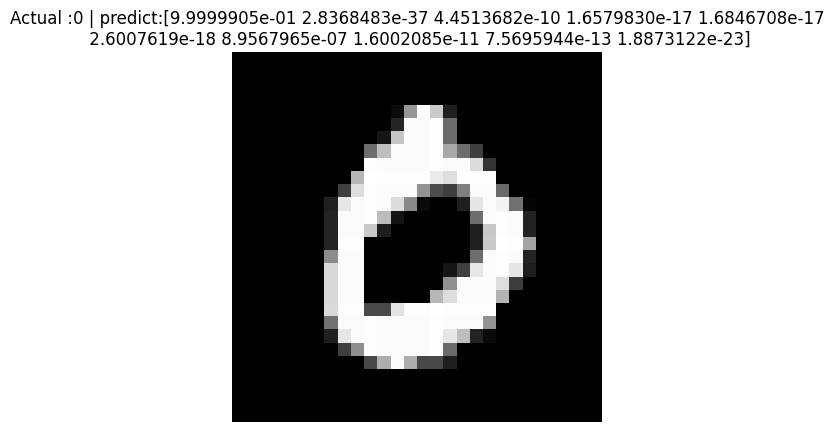

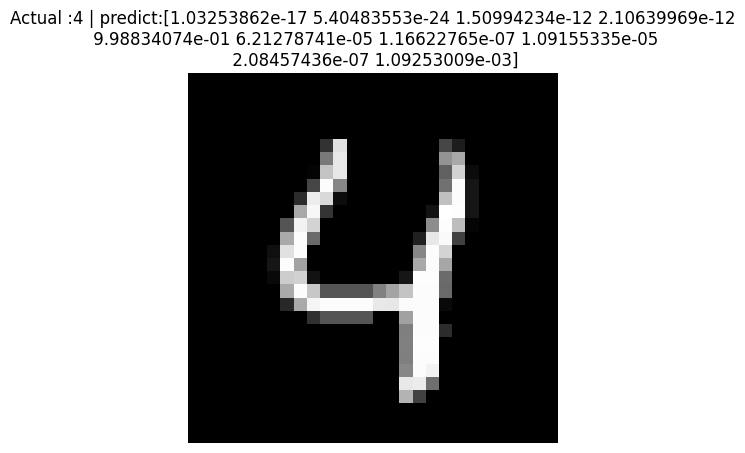

In [ ]:
# predict and Visualized
prediction=model.predict(x_test)
for i in range(5):
    plt.imshow(x_test[i],cmap='gray')
    plt.title(f"Actual :{y_test[i]} | predict:{prediction[i]}")
    plt.axis('off')
    plt.show()

In [ ]:
# save the model
model.save("mnist_model.h5")

NameError: name 'model' is not defined